In [56]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [ ]:
slopes = [-1.04,-1.009,-1.015,-1.023,-0.9514,-0.9774,-0.9674,-0.9226,-0.9508,-0.9123]
average = np.mean(slopes) # this is the average of the terminal velocities of the coffee filters
print(average)

-0.97689


In [ ]:
#Data for simulation of 10 coffee filters
p=1.204
M=0.03
#find C
v=average
g=9.8


# Part 2

In [54]:
def eulerMethod(v, p, a, m, c = 0.5, g=9.8):
    return (c*p*a*v**2)/(2*m) - g

M = 0.003 #kg
A = 150/10000 #cm^2 to m^2 
P = 1.22#kg/m^3
C = 0.5 #unitless

y_0 = 1
v_0 = 0
a_0 = eulerMethod(v_0, P, A, M)

total_time = 2 #s

#will have time as key, and list of [position, velocity, acceleration] as value
times = {}
times.update({0: [y_0, v_0, a_0]})

time_interval = 0.001
for time in np.arange(time_interval, total_time, time_interval):
    prev_time = time - time_interval
    prev_time = round(prev_time, 2)
    time = round(time, 2)
    prev_values = times.get(prev_time)
    a = eulerMethod(prev_values[1], P, A, M)
    v = prev_values[1] + a*time_interval
    y = prev_values[0] + v*time_interval
    if y < 0:
        break
    times.update({time: [y, v, a]})
    print(f"Time: {time}s, Position: {y}, Velocity: {v}, Acceleration: {a}")

Time: 0.0s, Position: 0.9999902, Velocity: -0.009800000000000001, Acceleration: -9.8
Time: 0.0s, Position: 0.999970600146461, Velocity: -0.019599853539000005, Acceleration: -9.799853539
Time: 0.0s, Position: 0.9999412008787573, Velocity: -0.02939926770375541, Acceleration: -9.799414164755406
Time: 0.0s, Position: 0.9999020029291369, Velocity: -0.0391979496204196, Acceleration: -9.798681916664187
Time: 0.0s, Position: 0.9998530073226474, Velocity: -0.04899560648955657, Acceleration: -9.797656869136972
Time: 0.01s, Position: 0.9997942153770263, Velocity: -0.05879194562113727, Acceleration: -9.7963391315807
Time: 0.01s, Position: 0.9997256287025568, Velocity: -0.06858667446951064, Acceleration: -9.794728848373374
Time: 0.01s, Position: 0.9996472492018884, Velocity: -0.0783795006683406, Acceleration: -9.792826198829951
Time: 0.01s, Position: 0.9995590790698229, Velocity: -0.08817013206549995, Acceleration: -9.790631397159348
Time: 0.01s, Position: 0.9994611207930649, Velocity: -0.097958276

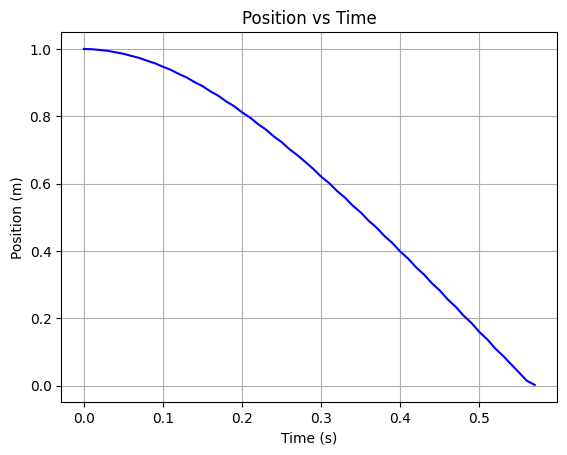

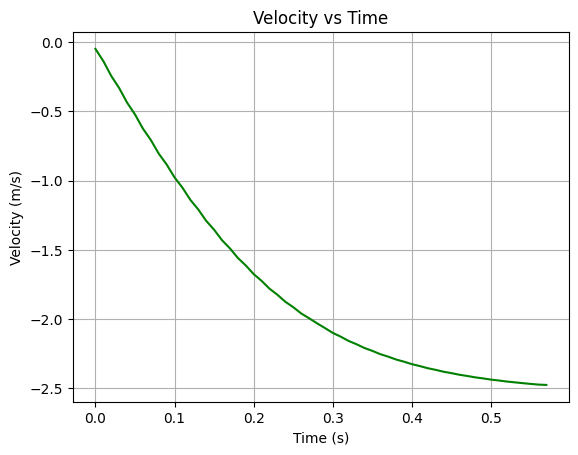

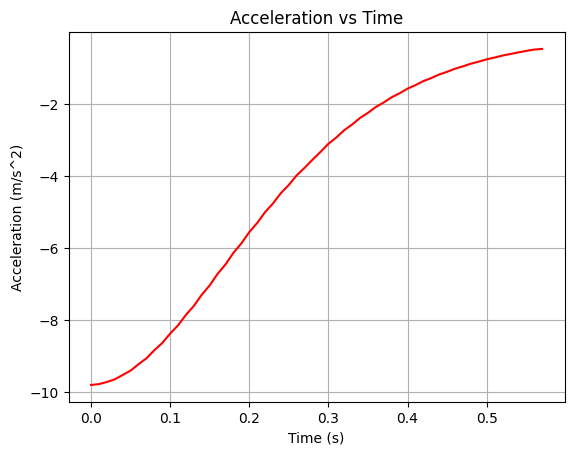

In [63]:
# Position vs Time
fig, ax = plt.subplots()

x = list(times.keys())
y = [times.get(key)[0] for key in times.keys()]

ax.plot(x, y, color='blue')
ax.set(xlabel='Time (s)', ylabel='Position (m)',
       title='Position vs Time')
ax.grid()
plt.show()

# Velocity vs Time
fig, ax = plt.subplots()

x = list(times.keys())
y = [times.get(key)[1] for key in times.keys()]

ax.plot(x, y, color='green')
ax.set(xlabel='Time (s)', ylabel='Velocity (m/s)',
       title='Velocity vs Time')
ax.grid()
plt.show()

# Acceleration vs Time
fig, ax = plt.subplots()

x = list(times.keys())
y = [times.get(key)[2] for key in times.keys()]

ax.plot(x, y, color='red')
ax.set(xlabel='Time (s)', ylabel='Acceleration (m/s^2)',
       title='Acceleration vs Time')
ax.grid()
plt.show()
